# Ejercicio 1: Regresión

Quiero definir una arquitectura básica que sea adecuada para que los alumnos realicen las primeras consignas, y luego investigar qué arquitectura puede ser la más adecuada en términos de rendimiento y número de parámetros.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Cargar los datos
df_train = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP4/Data/toyota_dev_train_processed.csv')
df_val = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP4/Data/toyota_dev_val_processed.csv')
df_test = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP4/Data/toyota_test_processed.csv')

# Identify columns in test set
test_columns = list(df_test.columns)

# Drop columns from training and validation sets that are not in the test set
train_data_filtered = df_train.loc[:, test_columns]
val_data_filtered = df_val.loc[:, test_columns]

# Estándarizar características numéricas
scaler = MinMaxScaler()

# Ajustar el escalador en los datos de entrenamiento y transformar todos los conjuntos
X_train_scaled = train_data_filtered.copy()
X_val_scaled = val_data_filtered.copy()
X_test_scaled = df_test.copy()

# Ajustar el escalador solo en las características numéricas de entrenamiento
X_train_scaled[['Año', 'Motor']] = scaler.fit_transform(df_train[['Año', 'Motor']])

# Transformar los conjuntos de validación y prueba
X_val_scaled[['Año', 'Motor']] = scaler.transform(df_val[['Año', 'Motor']])
X_test_scaled[['Año', 'Motor']] = scaler.transform(df_test[['Año', 'Motor']])

# Guardar los conjuntos de datos estandarizados si es necesario
X_train_scaled.to_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP4/Data/toyota_dev_train_processed_scaled.csv', index=False)
X_val_scaled.to_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP4/Data/toyota_dev_val_processed_scaled.csv', index=False)
X_test_scaled.to_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP4/Data/toyota_test_processed_scaled.csv', index=False)


# CORRER DESDE ACA

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Cargar los datos
train_path = '/home/linar/Desktop/ML/Clases/i302/TPs/TP4/Data/toyota_dev_train_processed_scaled.csv'
val_path = '/home/linar/Desktop/ML/Clases/i302/TPs/TP4/Data/toyota_dev_val_processed_scaled.csv'
test_path = '/home/linar/Desktop/ML/Clases/i302/TPs/TP4/Data/toyota_test_processed_scaled.csv'

train_data = pd.read_csv(train_path)
val_data = pd.read_csv(val_path)
test_data = pd.read_csv(test_path)


In [ ]:
X_train = train_data.drop(columns=['Precio'])
y_train = train_data['Precio']
X_val = val_data.drop(columns=['Precio'])
y_val = val_data['Precio']
X_test = test_data.drop(columns=['Precio'])
y_test = test_data['Precio']

In [ ]:
def evaluate_model(hidden_layer_sizes):
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='sgd',learning_rate_init=0.00000001, max_iter=300, random_state=42, batch_size=len(X_train))
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)
    mse_val = mean_squared_error(y_val, y_pred_val)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_val = r2_score(y_val, y_pred_val)
    r2_test = r2_score(y_test, y_pred_test)
    return mse_val, mse_test,r2_val, r2_test

In [ ]:
# Definir una lista de arquitecturas a probar
architectures = [ (20, 10, 5), (5, 10), (5, 5, 5),
    (10, 5, 10), (10, 5, 15), (10, 10, 10), (10, 10, 15), (15, 5, 10),
    (15, 10, 10), (15, 10, 15), (10, 5, 20), (10, 10, 20),
    (15, 5, 20), (15, 10, 20), (20, 10, 15), (20, 5, 10),
    (20, 10, 10), (20, 5, 20), (20, 15, 15), (5, 10, 10),
    (5, 15, 10), (5, 10, 15), (10, 15, 20), (5, 5, 15)
]

In [ ]:
# Evaluar las arquitecturas
results = {}
for arch in architectures:
    mse_val, mse_test, r2_val, r2_test = evaluate_model(hidden_layer_sizes=arch)
    results[arch] = {'MSE_Val': mse_val, 'MSE_Test': mse_test, 'R2_Val': r2_val, 'R2_Test': r2_test}
    print(f"Arquitectura: {arch} | MSE en Validación: {mse_val:.4f} | MSE en Prueba: {mse_test:.4f} \n | R2 en Validación: {r2_val:.4f} | R2 en Prueba: {r2_test:.4f}")

In [ ]:
# Graficar los resultados
plt.figure(figsize=(14, 7))
x_labels = [str(arch) for arch in architectures]
mse_val_list = [results[arch]['MSE_Val'] for arch in architectures]
mse_test_list = [results[arch]['MSE_Test'] for arch in architectures]

plt.plot(x_labels, mse_val_list, 'o-', label='MSE en Validación', color='blue')
plt.plot(x_labels, mse_test_list, 'o-', label='MSE en Prueba', color='red')
plt.xlabel('Arquitectura de la Red')
plt.ylabel('Error Cuadrático Medio')
plt.title('Evaluación de Diferentes Arquitecturas de Red Neuronal')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Graficar los resultados
plt.figure(figsize=(14, 7))
x_labels = [str(arch) for arch in architectures]
mse_val_list = [results[arch]['R2_Val'] for arch in architectures]
mse_test_list = [results[arch]['R2_Test'] for arch in architectures]

plt.plot(x_labels, mse_val_list, 'o-', label='R2 en Validación', color='blue')
plt.plot(x_labels, mse_test_list, 'o-', label='R2 en Prueba', color='red')
plt.xlabel('Arquitectura de la Red')
plt.ylabel('R2')
plt.title('Evaluación de Diferentes Arquitecturas de Red Neuronal')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Ejercicio 2: Clasificación

In [1]:
import torch
import torch.nn as nn

class FlexibleNN(nn.Module):
    def __init__(self, input_size, layer_sizes):
        """
        input_size: Tamaño de la capa de entrada
        layer_sizes: Lista con la cantidad de neuronas por capa oculta (ej: [64, 32, 16] -> 3 capas con 64, 32 y 16 neuronas)
        """
        super(FlexibleNN, self).__init__()
        
        # Crear una lista para las capas
        layers = []
        
        # Capa de entrada conectada a la primera capa oculta
        prev_size = input_size
        for layer_size in layer_sizes:
            layers.append(nn.Linear(prev_size, layer_size))
            layers.append(nn.ReLU())  # Activación ReLU
            prev_size = layer_size
        
        # Capa de salida (1 neurona, ya que es una tarea de clasificación binaria)
        layers.append(nn.Linear(prev_size, 1))
        layers.append(nn.Sigmoid())  # Activación Sigmoid para salida binaria
        
        # Usar nn.Sequential para apilar todas las capas
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)

### Grid search through architectures

In [7]:
import torch
import torch.optim as optim
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP4/Data/breast_cancer_dev.csv')

# Separar las características (features) y el target (clase)
X = df.drop(columns=['target'])  # Reemplazar 'target' con el nombre de la columna objetivo
y = df['target']

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir a tensores de PyTorch
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

# Parámetros del modelo
input_size = X_train.shape[1]
n_epochs = 300

#from itertools import product

# Definir combinaciones de hiperparámetros
layer_options = [[128, 128, 128],[128, 64, 128],
                [256, 128, 64],
                [128, 64, 32, 16],
                [256, 128, 64, 32],
                [64, 32],
                [32, 16],
                [128, 64, 32, 16, 8],
                [256, 128],]  # Diferentes configuraciones de capas
learning_rates = [0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]  # Diferentes tasas de aprendizaje
results = []

for layers in layer_options:
    for lr in learning_rates:
        # Inicializar el modelo
        model = FlexibleNN(input_size, layers)
        
        # Definir la función de pérdida y el optimizador
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)
        
        # Entrenar el modelo
        for epoch in range(n_epochs):
            model.train()
            optimizer.zero_grad()
            output = model(X_train_tensor)
            loss = criterion(output, y_train_tensor)
            loss.backward()
            optimizer.step()

        # Evaluar el modelo en el conjunto de validación
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val_tensor)
            y_val_pred_class = (y_val_pred > 0.5).float()
        
        # Calcular métricas
        accuracy = accuracy_score(y_val, y_val_pred_class)
        precision = precision_score(y_val, y_val_pred_class)
        recall = recall_score(y_val, y_val_pred_class)
        f1 = f1_score(y_val, y_val_pred_class)
        roc_auc = roc_auc_score(y_val, y_val_pred)

        # Almacenar resultados
        results.append({
            'layers': layers,
            'learning_rate': lr,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': roc_auc,
        })

# Convertir los resultados a un DataFrame para visualización
results_df = pd.DataFrame(results)

# Mostrar los resultados ordenados por F1 Score
print(results_df.sort_values(by='f1_score', ascending=False))

/home/linar/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/linar/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/linar/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/linar/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWar

                  layers  learning_rate  accuracy  precision    recall  \
49            [256, 128]   1.000000e-03  0.871795   0.666667  0.571429   
36              [32, 16]   1.000000e-02  0.858974   0.615385  0.571429   
13        [256, 128, 64]   1.000000e-03  0.858974   0.615385  0.571429   
30              [64, 32]   1.000000e-02  0.858974   0.615385  0.571429   
25    [256, 128, 64, 32]   1.000000e-03  0.858974   0.615385  0.571429   
19     [128, 64, 32, 16]   1.000000e-03  0.858974   0.615385  0.571429   
7         [128, 64, 128]   1.000000e-03  0.858974   0.615385  0.571429   
43  [128, 64, 32, 16, 8]   1.000000e-03  0.858974   0.615385  0.571429   
31              [64, 32]   1.000000e-03  0.871795   0.700000  0.500000   
1        [128, 128, 128]   1.000000e-03  0.846154   0.571429  0.571429   
0        [128, 128, 128]   1.000000e-02  0.820513   0.500000  0.642857   
48            [256, 128]   1.000000e-02  0.833333   0.533333  0.571429   
18     [128, 64, 32, 16]   1.000000e-0

/home/linar/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Define possible architecture as baseline

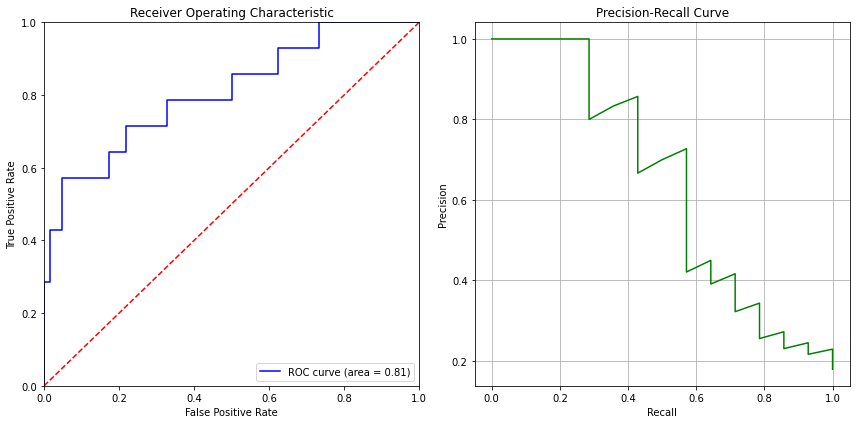

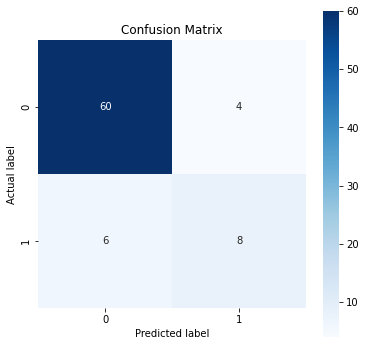

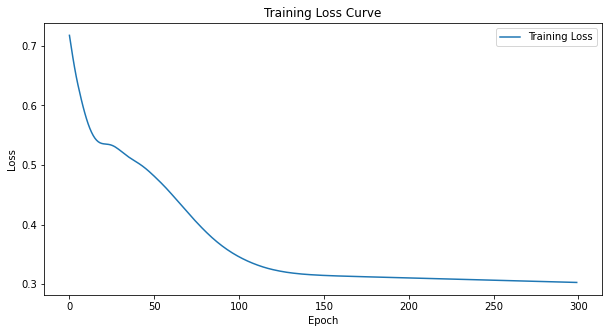

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP4/Data/breast_cancer_dev.csv')

# Separar características y target
X = df.drop(columns=['target'])  # Cambiar 'target' por el nombre de la columna objetivo
y = df['target']

# Dividir datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir a tensores de PyTorch
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

# Parámetros del modelo
input_size = X_train.shape[1]
n_epochs = 300
results = []
train_losses = []

# Inicializar el modelo
model = FlexibleNN(input_size, [256, 128])

# Definir la función de pérdida y el optimizador
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenar el modelo
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())  # Guardar el valor de la pérdida

# Evaluar el modelo en el conjunto de validación
model.eval()
with torch.no_grad():
    y_val_pred = model(X_val_tensor)
    y_val_pred_class = (y_val_pred > 0.5).float()

# Calcular métricas
accuracy = accuracy_score(y_val, y_val_pred_class)
precision = precision_score(y_val, y_val_pred_class)
recall = recall_score(y_val, y_val_pred_class)
f1 = f1_score(y_val, y_val_pred_class)
roc_auc = roc_auc_score(y_val, y_val_pred)

# Almacenar resultados
results.append({
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'roc_auc': roc_auc,
})
results_df = pd.DataFrame(results)

# Ploteo de la curva ROC
fpr, tpr, _ = roc_curve(y_val, y_val_pred)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Ploteo de la curva PR
precision_vals, recall_vals, _ = precision_recall_curve(y_val, y_val_pred)
plt.subplot(1, 2, 2)
plt.plot(recall_vals, precision_vals, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()

plt.tight_layout()
plt.show()

# Ploteo de la matriz de confusión
conf_matrix = confusion_matrix(y_val, y_val_pred_class)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Ploteo de las curvas de error
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

In [3]:
# Evaluar el modelo en el conjunto de prueba
# Cargar los datos de prueba
df_test = pd.read_csv('/home/linar/Desktop/ML/Clases/i302/TPs/TP4/Data/breast_cancer_test.csv')
X_test = df_test.drop(columns=['target'])  # Cambiar 'target' por el nombre de la columna objetivo
y_test = df_test['target']

# Convertir a tensores de PyTorch
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Evaluar en el conjunto de prueba
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    y_test_pred_class = (y_test_pred > 0.5).float()

# Calcular métricas para el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_pred_class)
test_precision = precision_score(y_test, y_test_pred_class)
test_recall = recall_score(y_test, y_test_pred_class)
test_f1 = f1_score(y_test, y_test_pred_class)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Imprimir resultados del conjunto de prueba
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test ROC AUC: {test_roc_auc:.4f}")

Test Accuracy: 0.8551
Test Precision: 0.6667
Test Recall: 0.5714
Test F1 Score: 0.6154
Test ROC AUC: 0.8130


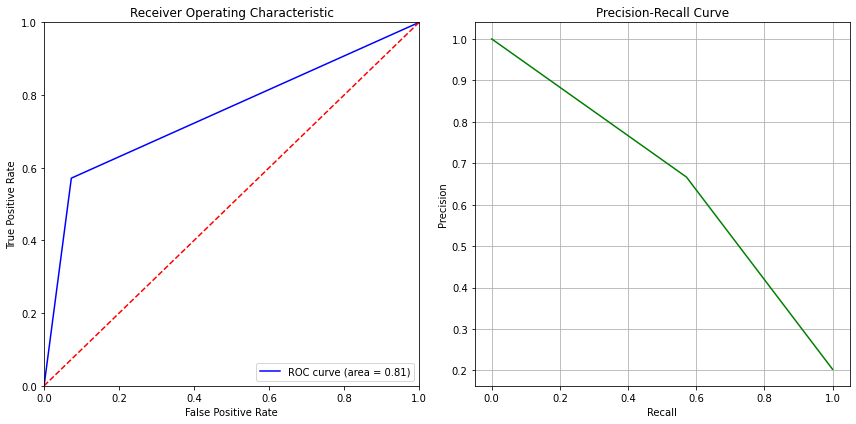

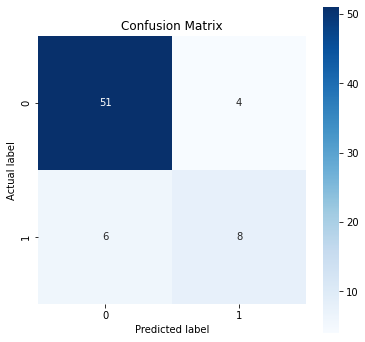

In [4]:
# Ploteo de la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_test_pred_class)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Ploteo de la curva PR
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_class)
plt.subplot(1, 2, 2)
plt.plot(recall_test, precision_test, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()

plt.tight_layout()
plt.show()

# Ploteo de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred_class)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()